# Tree Models

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import nan_count, nan_col_obj_list_fillna
from Self_Written_Functions_Sheet import mvarea_1_to_0, mvarea_0_to_mean, mvtype_none_to_mode
from Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_full_strd.csv', index_col=0)
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


# RANDOM FOREST

In [4]:
state = 0

# setting up train_full and test_full sets
xtrain_rfr_full, xtest_rfr_full, ytrain_rfr_full, ytest_rfr_full = ms.train_test_split(hp_full_strd,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_full = ytrain_rfr_full.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

### using full dataset

In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [10, 25, 50, 100, 250, 500]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_full = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_full.fit(xtrain_rfr_full, ytrain_rfr_full)

# setting up dataframe for results
train_scores.append(gs_rfr_full.best_estimator_.score(xtrain_rfr_full, ytrain_rfr_full))
test_scores.append(gs_rfr_full.best_estimator_.score(xtest_rfr_full, ytest_rfr_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_full, ytrain_rfr_full, xtrain_rfr_full))
test_rmse.append(rmse(gs_rfr_full, ytest_rfr_full, xtest_rfr_full))

# add the best parameters to the df
best_par_list.append(gs_rfr_full.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 23min 36s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.974923,0.911359,0.062766,0.122566,-0.059799,50,2,2,100,True,True


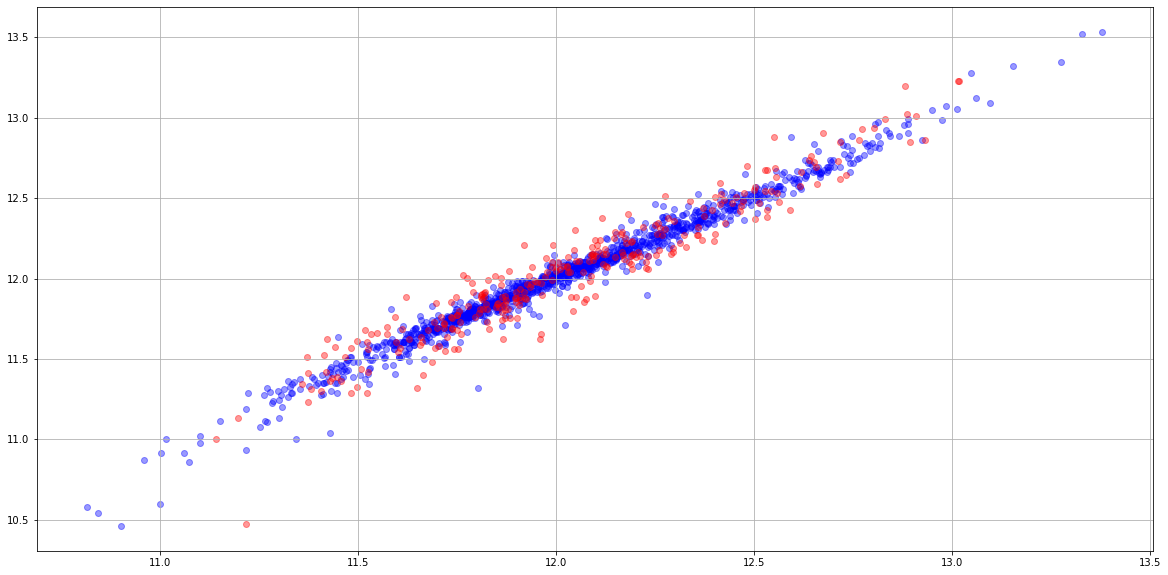

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_full.best_estimator_.predict(xtrain_rfr_full), ytrain_rfr_full, color='blue', alpha=0.4)
plt.scatter(gs_rfr_full.best_estimator_.predict(xtest_rfr_full), ytest_rfr_full, color='red', alpha=0.4)
plt.grid(which='both')

In [7]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# parameters to use
maxdepth = [500]
minsamlf = [2]
minsamsplt = [3]
nestimators = [500]
oobscore = [False]
warmstart = [False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_full_2 = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_full_2.fit(xtrain_rfr_full, ytrain_rfr_full)

# setting up dataframe for results
train_scores.append(gs_rfr_full_2.best_estimator_.score(xtrain_rfr_full, ytrain_rfr_full))
test_scores.append(gs_rfr_full_2.best_estimator_.score(xtest_rfr_full, ytest_rfr_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_full_2, ytrain_rfr_full, xtrain_rfr_full))
test_rmse.append(rmse(gs_rfr_full_2, ytest_rfr_full, xtest_rfr_full))

# add the best parameters to the df
best_par_list.append(gs_rfr_full_2.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 12.6 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.974743,0.91285,0.062991,0.12153,-0.05854,500,2,3,500,False,False


# parameters to use for full dataset from gs_rfr_full_2
- maxdepth = [500]
- minsamlf = [2]
- minsamsplt = [3]
- nestimators = [500]
- oobscore = [False]
- warmstart = [False]

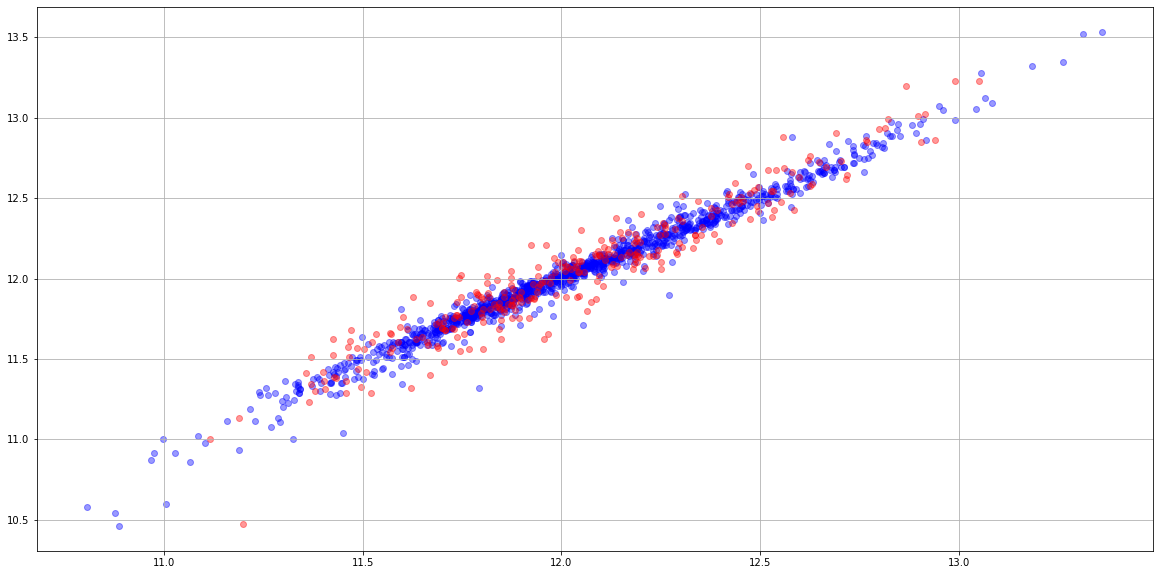

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_full_2.best_estimator_.predict(xtrain_rfr_full), ytrain_rfr_full, color='blue', alpha=0.4)
plt.scatter(gs_rfr_full_2.best_estimator_.predict(xtest_rfr_full), ytest_rfr_full, color='red', alpha=0.4)
plt.grid(which='both')

### using lasso reduced dataset

In [9]:
hp_lasso_strd_reduced = pd.read_csv('..\hp_lasso_strd_reduced.csv', index_col=0)
hp_lasso_strd_reduced

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,TotalBaths,BsmtFinTotalSF,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gable,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_Stone,ExterQual_Fa,ExterQual_TA,ExterCond_Fa,ExterCond_TA,Foundation_PConc,Foundation_Wood,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType2_BLQ,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_TA,Functional_Maj2,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf,GarageQual_Gd,GarageCond_Fa,PavedDrive_Y,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30.0,MSSubClass_70.0,MSSubClass_90.0,MSSubClass_160.0,LotFrontage
0,0.015398,0.029344,0.023029,0.026608,0.024858,0.029998,0.019815,0.018420,0.028104,0.039163,0.041487,0.024485,0.031232,0.000000,0.027315,0.027731,0.000000,0.019967,0.0,0.035089,0.027808,0.0,0.011747,0.031623,0.000000,0.004240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.023186
1,0.017494,0.025152,0.036846,0.026250,0.000000,0.041555,0.029214,0.027156,0.020741,0.000000,0.000000,0.024485,0.023424,0.029553,0.027315,0.023278,0.049806,0.000000,0.0,0.028071,0.038521,0.0,0.000000,0.000000,0.037878,0.026288,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028536
2,0.020500,0.029344,0.023029,0.026582,0.020546,0.020650,0.021297,0.019797,0.029353,0.039163,0.041487,0.024485,0.023424,0.029553,0.027315,0.030767,0.000000,0.013748,0.0,0.035089,0.019143,0.0,0.008088,0.031623,0.000000,0.005088,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.024256
3,0.017403,0.029344,0.023029,0.025439,0.000000,0.009178,0.017501,0.020679,0.028219,0.039163,0.000000,0.024485,0.027328,0.029553,0.040973,0.032487,0.000000,0.011456,0.0,0.014036,0.008508,0.0,0.059119,0.031623,0.000000,0.030529,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.021402
4,0.025985,0.033536,0.023029,0.026568,0.044389,0.027831,0.026505,0.024638,0.036124,0.039163,0.041487,0.024485,0.035136,0.029553,0.040973,0.042304,0.032090,0.027495,0.0,0.035089,0.025799,0.0,0.016176,0.031623,0.037878,0.006784,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
# since hp_lasso_strd_reduced was created after removing the outlier for MLR previously
hp_logsaleprice = hp_logsaleprice.drop([820])
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


In [11]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_full and test_full sets
xtrain_rfr_lso, xtest_rfr_lso, ytrain_rfr_lso, ytest_rfr_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_lso = ytrain_rfr_lso.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# parameters to use
maxdepth = [10, 25, 50, 100, 250]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_lso = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_lso.fit(xtrain_rfr_lso, ytrain_rfr_lso)

# setting up dataframe for results
train_scores.append(gs_rfr_lso.best_estimator_.score(xtrain_rfr_lso, ytrain_rfr_lso))
test_scores.append(gs_rfr_lso.best_estimator_.score(xtest_rfr_lso, ytest_rfr_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_lso, ytrain_rfr_lso, xtrain_rfr_lso))
test_rmse.append(rmse(gs_rfr_lso, ytest_rfr_lso, xtest_rfr_lso))

# add the best parameters to the df
best_par_list.append(gs_rfr_lso.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 11min 7s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.983582,0.894574,0.050846,0.133002,-0.082156,25,1,2,500,True,False


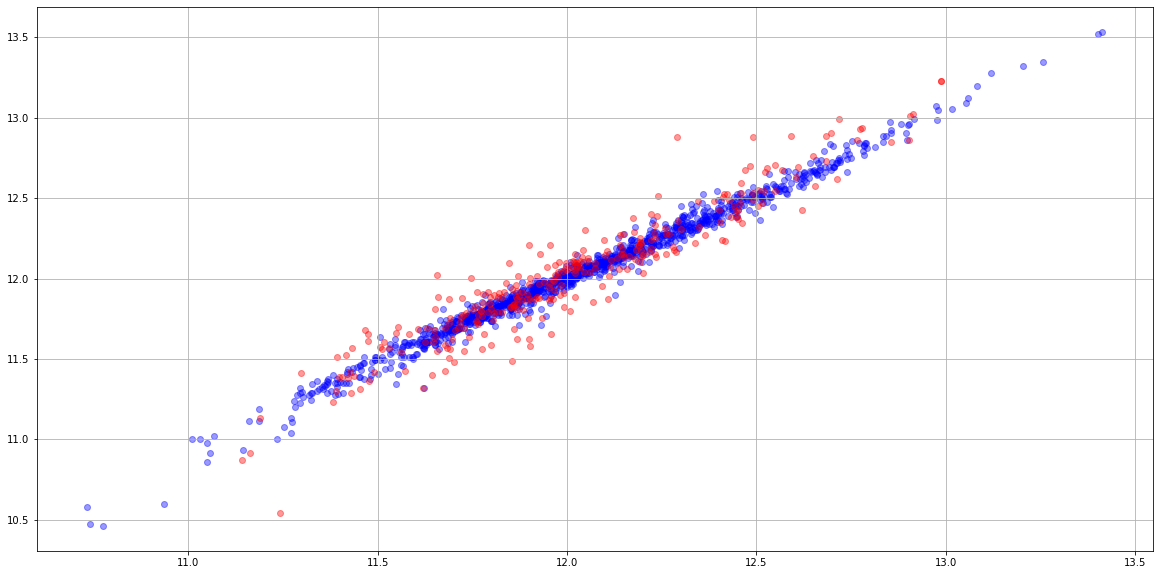

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_lso.best_estimator_.predict(xtrain_rfr_lso), ytrain_rfr_lso, color='blue', alpha=0.4)
plt.scatter(gs_rfr_lso.best_estimator_.predict(xtest_rfr_lso), ytest_rfr_lso, color='red', alpha=0.4)
plt.grid(which='both')

In [13]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [150, 200, 250, 300]
minsamlf = [1, 2, 3]
minsamsplt = [2, 3, 4]
nestimators = [300, 350, 400, 450]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_lso_1 = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_lso_1.fit(xtrain_rfr_lso, ytrain_rfr_lso)

# setting up dataframe for results
train_scores.append(gs_rfr_lso_1.best_estimator_.score(xtrain_rfr_lso, ytrain_rfr_lso))
test_scores.append(gs_rfr_lso_1.best_estimator_.score(xtest_rfr_lso, ytest_rfr_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_lso_1, ytrain_rfr_lso, xtrain_rfr_lso))
test_rmse.append(rmse(gs_rfr_lso_1, ytest_rfr_lso, xtest_rfr_lso))

# add the best parameters to the df
best_par_list.append(gs_rfr_lso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 5min 22s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.983592,0.8947,0.05083,0.132922,-0.082092,300,1,2,450,False,False


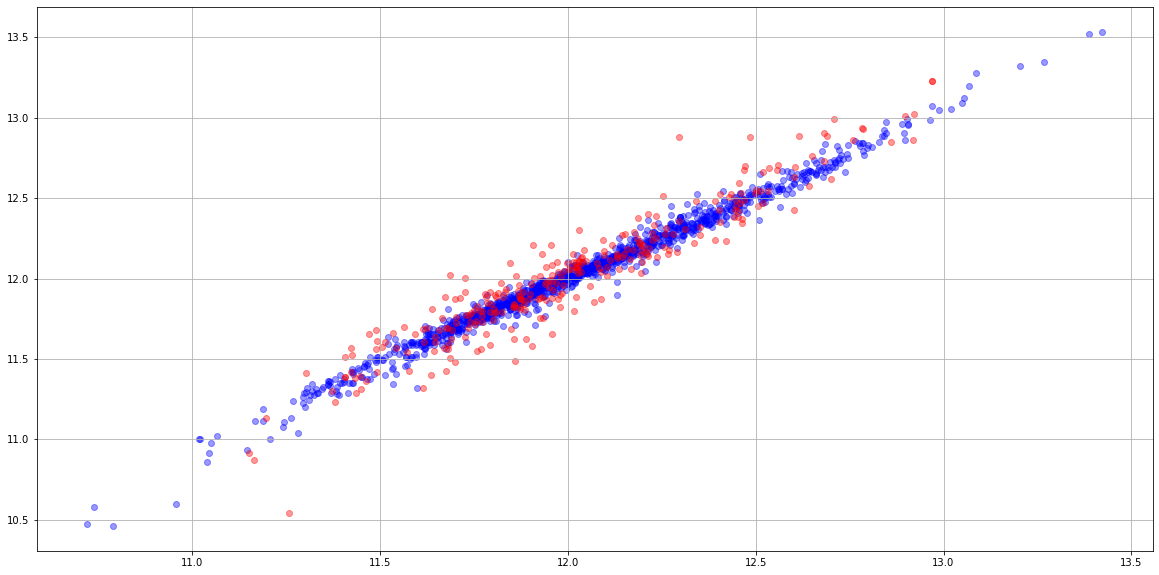

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_lso_1.best_estimator_.predict(xtrain_rfr_lso), ytrain_rfr_lso, color='blue', alpha=0.4)
plt.scatter(gs_rfr_lso_1.best_estimator_.predict(xtest_rfr_lso), ytest_rfr_lso, color='red', alpha=0.4)
plt.grid(which='both')

- very little improvement and the test scores are too far apart

## Will not use Lasso reduced dataset for RFR

## Checking feature importance:

In [15]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                               gs_rfr_full_2.best_estimator_.feature_importances_),
                           key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('OverallQual', 0.5335074044233357),
 ('GrLivArea', 0.10465450903710004),
 ('TotalBsmtSF', 0.04607172405794964),
 ('GarageCars', 0.042512996682233184),
 ('GarageArea', 0.03611999702066364),
 ('1stFlrSF', 0.019115394820901164),
 ('YearBuilt', 0.01775166795647481),
 ('BsmtFinSF1', 0.016523115243400485),
 ('BsmtFinTotalSF', 0.01587392172002068),
 ('CentralAir_Y', 0.014156507309838067),
 ('OverallCond', 0.012886345522517608),
 ('LotArea', 0.010916244444872353),
 ('YrsRemodToSold', 0.008819713934144291),
 ('Fireplaces', 0.006493149857082277),
 ('LotFrontage', 0.0064556426116842746),
 ('YearRemodAdd', 0.005957152503831798),
 ('GarageFinish_Unf', 0.004826922753964605),
 ('2ndFlrSF', 0.004774350988403346),
 ('MSZoning_RM', 0.004747657275415521),
 ('BsmtUnfSF', 0.004727689497970828),
 ('GarageType_Detchd', 0.003895876892907083),
 ('GarageYrBlt', 0.003643728261954344),
 ('TotalBaths', 0.003449372730497917),
 ('MasVnrArea', 0.003183144140662152),
 ('TotalPorchSF', 0.0031683687383265834),
 ('TotR

In [16]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('OverallQual', 0.5335074044233357),
 ('GrLivArea', 0.10465450903710004),
 ('TotalBsmtSF', 0.04607172405794964),
 ('GarageCars', 0.042512996682233184),
 ('GarageArea', 0.03611999702066364),
 ('1stFlrSF', 0.019115394820901164),
 ('YearBuilt', 0.01775166795647481),
 ('BsmtFinSF1', 0.016523115243400485),
 ('BsmtFinTotalSF', 0.01587392172002068),
 ('CentralAir_Y', 0.014156507309838067),
 ('OverallCond', 0.012886345522517608),
 ('LotArea', 0.010916244444872353),
 ('YrsRemodToSold', 0.008819713934144291),
 ('Fireplaces', 0.006493149857082277),
 ('LotFrontage', 0.0064556426116842746),
 ('YearRemodAdd', 0.005957152503831798),
 ('GarageFinish_Unf', 0.004826922753964605),
 ('2ndFlrSF', 0.004774350988403346),
 ('MSZoning_RM', 0.004747657275415521),
 ('BsmtUnfSF', 0.004727689497970828),
 ('GarageType_Detchd', 0.003895876892907083),
 ('GarageYrBlt', 0.003643728261954344),
 ('TotalBaths', 0.003449372730497917),
 ('MasVnrArea', 0.003183144140662152),
 ('TotalPorchSF', 0.0031683687383265834),
 ('TotR

In [17]:
top_filtered_sorted_importance_rfr = [x for x in filtered_sorted_importance_rfr if x[1]>0.01]
top_filtered_sorted_importance_rfr

[('OverallQual', 0.5335074044233357),
 ('GrLivArea', 0.10465450903710004),
 ('TotalBsmtSF', 0.04607172405794964),
 ('GarageCars', 0.042512996682233184),
 ('GarageArea', 0.03611999702066364),
 ('1stFlrSF', 0.019115394820901164),
 ('YearBuilt', 0.01775166795647481),
 ('BsmtFinSF1', 0.016523115243400485),
 ('BsmtFinTotalSF', 0.01587392172002068),
 ('CentralAir_Y', 0.014156507309838067),
 ('OverallCond', 0.012886345522517608),
 ('LotArea', 0.010916244444872353)]

Text(0.5, 1.0, 'Feature Importance Plot of 500-Tree GBM')

<Figure size 1440x720 with 0 Axes>

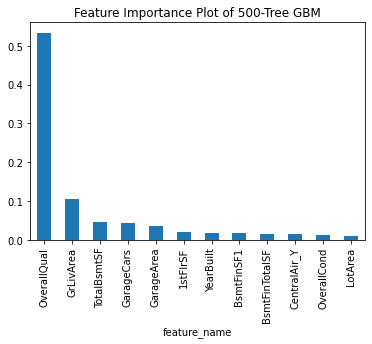

In [18]:
# Plotting the most important features
plt.figure(figsize=(20, 10))
a, b = zip(*top_filtered_sorted_importance_rfr) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',
                                                                y='importance_score',
                                                                legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')

- BsmtFinTotalSF (column that I added) is among those that are considered most important
- Considering the expectation of some correlation/multicollinearity between BsmtFinTotalSF and a couple of other colums in the graph, it is surprising that RFR did not weed out some of them

In [19]:
# get list of column names for easier application in the future
rfr_filter_important = []
for tup in filtered_sorted_importance_rfr:
    rfr_filter_important.append(tup[0])
    
rfr_filter_important

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 '1stFlrSF',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtFinTotalSF',
 'CentralAir_Y',
 'OverallCond',
 'LotArea',
 'YrsRemodToSold',
 'Fireplaces',
 'LotFrontage',
 'YearRemodAdd',
 'GarageFinish_Unf',
 '2ndFlrSF',
 'MSZoning_RM',
 'BsmtUnfSF',
 'GarageType_Detchd',
 'GarageYrBlt',
 'TotalBaths',
 'MasVnrArea',
 'TotalPorchSF',
 'TotRmsAbvGrd',
 'MoSold',
 'OpenPorchSF',
 'WoodDeckSF',
 'ExterCond_Fa',
 'KitchenAbvGr',
 'LotShape_Reg',
 'GarageType_Attchd',
 'BsmtQual_Gd',
 'KitchenQual_Gd',
 'MSSubClass_30.0',
 'YrSold',
 'KitchenQual_TA',
 'SaleCondition_Normal',
 'EnclosedPorch',
 'BedroomAbvGr',
 'PavedDrive_Y',
 'Neighborhood_IDOTRR',
 'MSZoning_RL',
 'BsmtBaths',
 'HeatingQC_TA',
 'Electrical_SBrkr',
 'ExterQual_TA',
 'Neighborhood_OldTown',
 'BsmtQual_TA',
 'BsmtExposure_No',
 'BsmtExposure_Gd',
 'HeatingQC_Fa',
 'HalfBath',
 'Functional_Typ',
 'Condition1_Norm',
 'BsmtFinType1_GLQ',
 'SaleCondition_Family',
 'G

# After Dropping Outlier for full dataset

In [20]:
hp_full_strd = hp_full_strd.drop([820])

In [21]:
state = 0

# setting up train_full and test_full sets
xtrain_rfr_drop,xtest_rfr_drop,ytrain_rfr_drop,ytest_rfr_drop = ms.train_test_split(hp_full_strd,
                                                                                   hp_logsaleprice,
                                                                                   test_size=0.2,
                                                                                   random_state=state)

# Must flatten to fit
ytrain_rfr_drop = ytrain_rfr_drop.values.flatten()

rfr = RandomForestRegressor()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [22]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# parameters to use
maxdepth = [10, 25, 50, 100, 250, 500]
minsamlf = [1, 2, 3, 4, 5]
minsamsplt = [2, 3, 4, 5]
nestimators = [100, 250, 400, 500]
oobscore = [True, False]
warmstart = [True, False]

gparam_rfr = {'max_depth': maxdepth,
              'min_samples_leaf': minsamlf,
              'min_samples_split': minsamsplt,
              'n_estimators': nestimators,
              'oob_score': oobscore,
              'warm_start': warmstart}

# setting parameters
gs_rfr_drop = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr_drop.fit(xtrain_rfr_drop, ytrain_rfr_drop)

# setting up dataframe for results
train_scores.append(gs_rfr_drop.best_estimator_.score(xtrain_rfr_drop, ytrain_rfr_drop))
test_scores.append(gs_rfr_drop.best_estimator_.score(xtest_rfr_drop, ytest_rfr_drop))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr_drop, ytrain_rfr_drop, xtrain_rfr_drop))
test_rmse.append(rmse(gs_rfr_drop, ytest_rfr_drop, xtest_rfr_drop))

# add the best parameters to the df
best_par_list.append(gs_rfr_drop.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 23min 18s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,max_depth,min_samples_leaf,min_samples_split,n_estimators,oob_score,warm_start
0,0.974291,0.892077,0.063627,0.134567,-0.070941,100,2,4,100,True,False


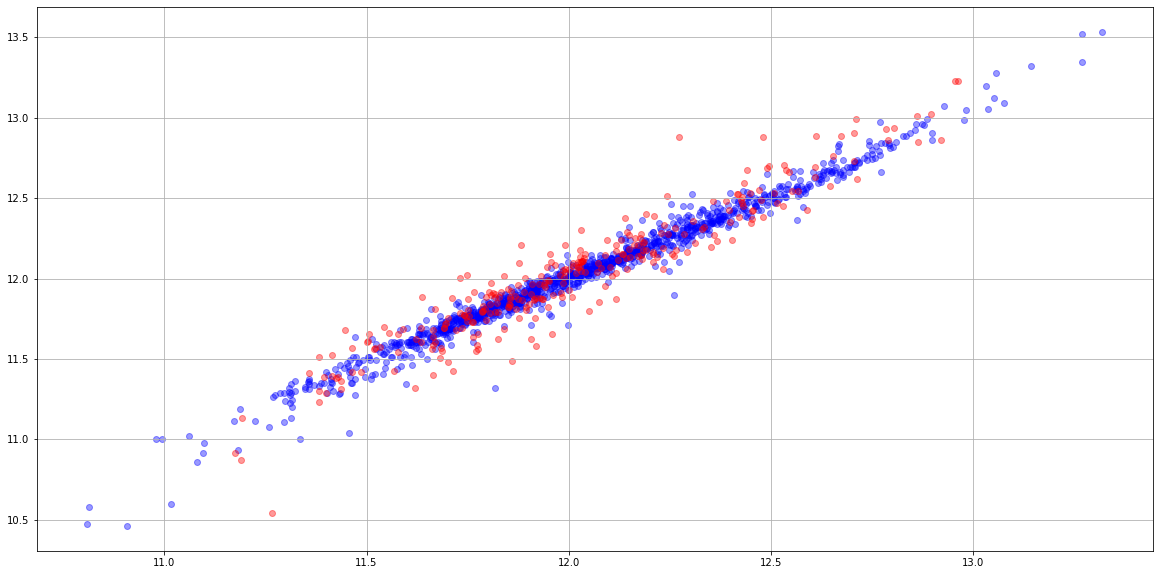

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr_drop.best_estimator_.predict(xtrain_rfr_drop), ytrain_rfr_drop, color='blue', alpha=0.4)
plt.scatter(gs_rfr_drop.best_estimator_.predict(xtest_rfr_drop), ytest_rfr_drop, color='red', alpha=0.4)
plt.grid(which='both')

- it seems that the outlier is needed to ensure a higher test score

## Gradient Boosting Regressions

# Using full dataset

In [39]:
# after seeing that removing the outlier causes a worse test score, will reset the data to include it
hp_full_strd = pd.read_csv('..\hp_full_strd.csv', index_col=0)
hp_logsaleprice = pd.read_csv('..\hp_logsaleprice.csv', index_col=0)

In [40]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1

In [25]:
state = 0

xtrain_gb_full, xtest_gb_full, ytrain_gb_full, ytest_gb_full = ms.train_test_split(hp_full_strd,
                                                                               hp_logsaleprice,
                                                                               test_size=0.2,
                                                                               random_state=state)

ytrain_gb_full = ytrain_gb_full.values.flatten()

gbm = GradientBoostingRegressor(verbose=1)

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [26]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200]

maxfeatures = [9, 40, 100, 250]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1353            0.40s
         2           0.1175            0.40s
         3           0.1026            0.33s
         4           0.0904            0.34s
         5           0.0793            0.35s
         6           0.0704            0.32s
         7           0.0629            0.30s
         8           0.0553            0.31s
         9           0.0493            0.30s
        10           0.0441            0.30s
        20           0.0189            0.27s
        30           0.0116            0.25s
        40           0.0087            0.23s
        50           0.0071            0.22s
        60           0.0062            0.20s
        70           0.0055            0.19s
        80           0.0050            0.17s
        90           0.0046            0.16s
       100           0.0042            0.14s
       200           0.0020            0.00s
Wall time: 15.4 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.987362,0.932203,0.044558,0.107191,-0.062633,0.1,4,40,200


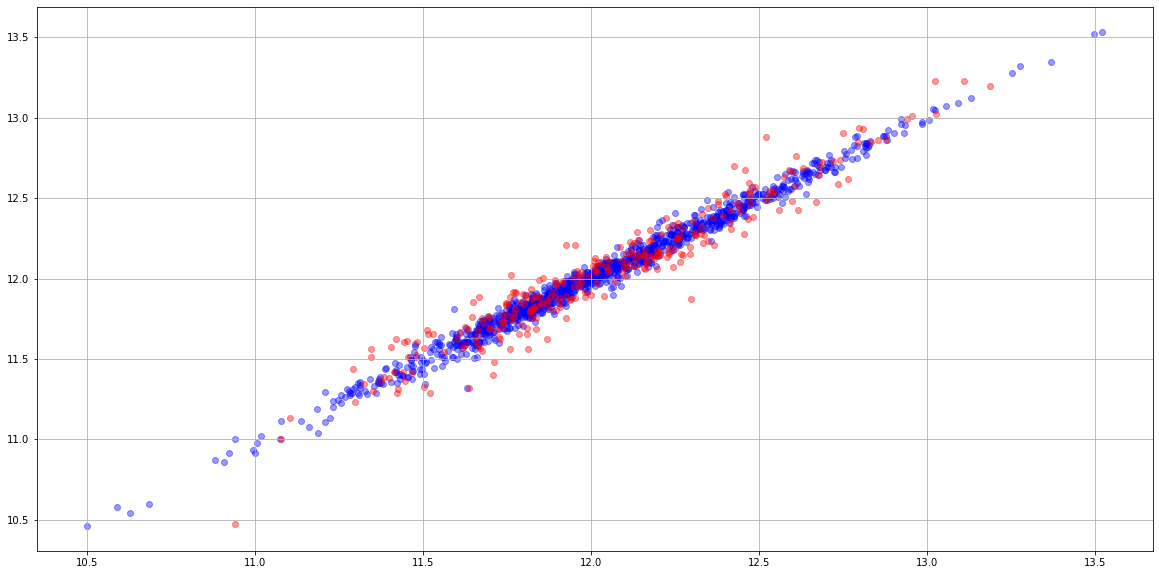

In [27]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [28]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.005, 0.0075, 0.01, 0.05, 0.075] # subsequently, fine tune
nestimators = [125, 150, 175, 200, 250, 300, 400, 500, 1000]

maxfeatures = [10, 20, 30, 40, 50, 60, 70, 80, 90]
maxdepth = [3, 4, 5]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_1 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_1.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm_1.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm_1.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_1, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm_1, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1473            1.00s
         2           0.1383            1.00s
         3           0.1306            1.00s
         4           0.1246            1.25s
         5           0.1178            1.20s
         6           0.1108            1.16s
         7           0.1048            1.14s
         8           0.0986            1.12s
         9           0.0932            1.10s
        10           0.0891            0.99s
        20           0.0542            0.93s
        30           0.0363            0.91s
        40           0.0265            0.89s
        50           0.0209            0.86s
        60           0.0173            0.85s
        70           0.0151            0.84s
        80           0.0135            0.82s
        90           0.0123            0.81s
       100           0.0113            0.79s
       200           0.0073            0.70s
       300           0.0056            0.61s
       40

,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.988942,0.934986,0.041679,0.104968,-0.063289,0.05,3,30,1000


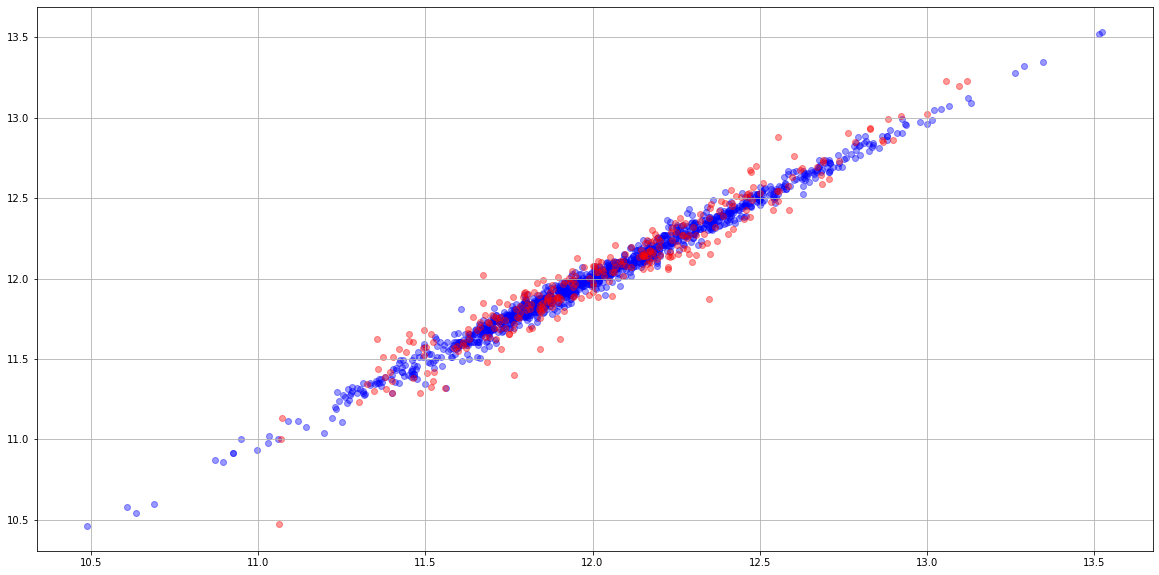

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_1.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm_1.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

In [30]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

learningrate = [0.041, 0.042, 0.043, 0.044] # subsequently, fine tune
nestimators = [391, 392, 393, 394, 395, 396, 397, 398, 399, 400]
maxfeatures = [21]
maxdepth = [4]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_5 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_5.fit(xtrain_gb_full, ytrain_gb_full)

# setting up dataframe for results
train_scores.append(gs_gbm_5.best_estimator_.score(xtrain_gb_full, ytrain_gb_full))
test_scores.append(gs_gbm_5.best_estimator_.score(xtest_gb_full, ytest_gb_full))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_5, ytrain_gb_full, xtrain_gb_full))
test_rmse.append(rmse(gs_gbm_5, ytest_gb_full, xtest_gb_full))

# add the best parameters to the df
best_par_list.append(gs_gbm_5.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1490            0.39s
         2           0.1415            0.39s
         3           0.1350            0.39s
         4           0.1281            0.39s
         5           0.1216            0.39s
         6           0.1158            0.39s
         7           0.1100            0.39s
         8           0.1048            0.39s
         9           0.0993            0.39s
        10           0.0946            0.38s
        20           0.0587            0.36s
        30           0.0388            0.33s
        40           0.0274            0.32s
        50           0.0207            0.31s
        60           0.0166            0.30s
        70           0.0139            0.28s
        80           0.0119            0.27s
        90           0.0106            0.26s
       100           0.0096            0.26s
       200           0.0054            0.17s
       300           0.0037            0.08s
Wall time

,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.98167,0.929816,0.053662,0.109062,-0.0554,0.041,4,21,394


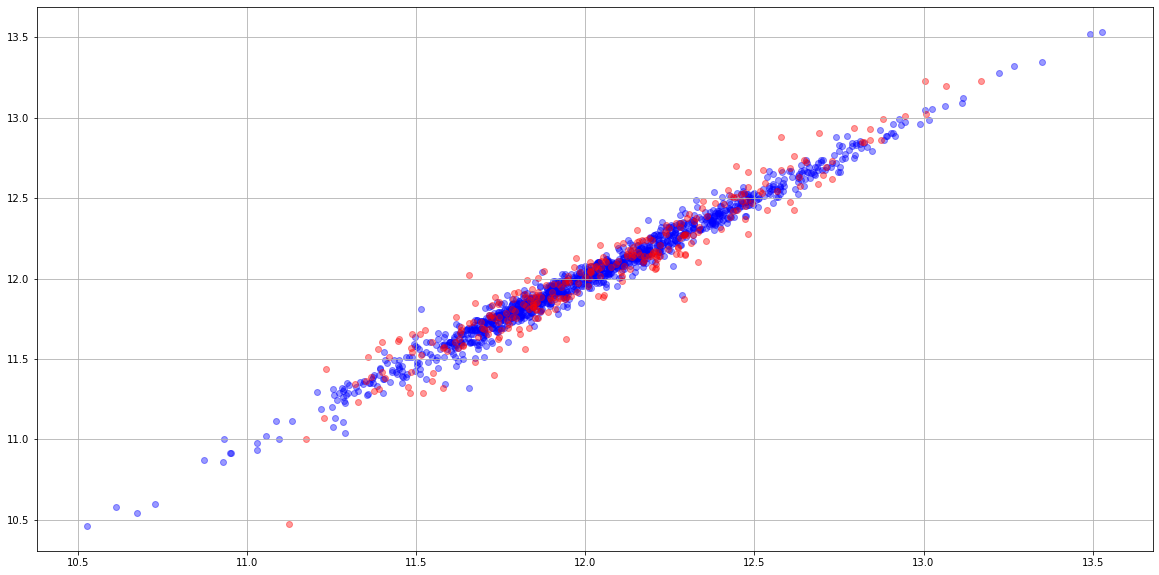

In [31]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_5.best_estimator_.predict(xtrain_gb_full), ytrain_gb_full, color='blue', alpha=0.4)
plt.scatter(gs_gbm_5.best_estimator_.predict(xtest_gb_full), ytest_gb_full, color='red', alpha=0.4)
plt.grid(which='both')

## Attempting Gradient Boosting with reduced dataset

In [32]:
hp_rfr_fltr = hp_full_strd[rfr_filter_important]
hp_rfr_fltr.to_csv('..\hp_rfr_fltr.csv')
hp_rfr_fltr

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,BsmtFinTotalSF,CentralAir_Y,OverallCond,LotArea,YrsRemodToSold,Fireplaces,LotFrontage,YearRemodAdd,GarageFinish_Unf,2ndFlrSF,MSZoning_RM,BsmtUnfSF,GarageType_Detchd,GarageYrBlt,TotalBaths,MasVnrArea,TotalPorchSF,TotRmsAbvGrd,MoSold,OpenPorchSF,WoodDeckSF,ExterCond_Fa,KitchenAbvGr,LotShape_Reg,GarageType_Attchd,BsmtQual_Gd,KitchenQual_Gd,MSSubClass_30.0,YrSold,KitchenQual_TA,SaleCondition_Normal,EnclosedPorch,BedroomAbvGr,PavedDrive_Y,Neighborhood_IDOTRR,MSZoning_RL,BsmtBaths,HeatingQC_TA,Electrical_SBrkr,ExterQual_TA,Neighborhood_OldTown,BsmtQual_TA,BsmtExposure_No,BsmtExposure_Gd,HeatingQC_Fa,HalfBath,Functional_Typ,Condition1_Norm,BsmtFinType1_GLQ,SaleCondition_Family,GarageFinish_RFn,BsmtFinType1_Unf,Neighborhood_NAmes,RoofStyle_Hip,Neighborhood_Edwards,Exterior1st_VinylSd,FullBath,Neighborhood_Crawfor,ExterCond_TA,HeatingQC_Gd,ExterQual_Gd,LandContour_Lvl,RoofStyle_Gable,Foundation_CBlock,MSSubClass_60.0,LotConfig_Inside,Exterior2nd_VinylSd,Exterior1st_MetalSd,FireplaceQu_Gd,ScreenPorch,BsmtFullBath,Foundation_PConc,BsmtCond_TA,Exterior1st_Wd Sdng,LandSlope_Mod,SaleType_WD,Exterior2nd_MetalSd,ExterQual_Fa,MSSubClass_50.0,Porches,Decks,Exterior1st_BrkFace,Neighborhood_NWAmes,MSSubClass_20.0,Condition1_Feedr,BsmtFinType1_Rec,Exterior2nd_Plywood,ExterCond_Gd,Neighborhood_Sawyer,BsmtHalfBath,BsmtFinSF2,HouseStyle_2Story,HouseStyle_1Story,FireplaceQu_TA,FireplaceQu_Po,MasVnrType_BrkFace,SaleCondition_Partial,GarageType_CarPort,KitchenQual_Fa,Neighborhood_CollgCr,Exterior2nd_Wd Sdng,GarageQual_Fa,Neighborhood_Somerst,Exterior2nd_HdBoard,BsmtQual_Fa,SaleType_New,Heating_Grav,Neighborhood_BrkSide,Exterior1st_Plywood,Exterior1st_HdBoard,MasVnrType_Stone,MiscVal,BsmtFinType1_BLQ,MasVnrType_None,LandContour_HLS,MSSubClass_70.0,GarageCond_Fa,PavedDrive_P,Neighborhood_NoRidge,BsmtExposure_Mn,LotConfig_CulDSac,GarageQual_TA,MSSubClass_80.0,2ndFlr,BsmtFinType2_BLQ,BsmtFinType1_LwQ,Functional_Maj2,Functional_Mod,BsmtUnfin,MSSubClass_160.0,Neighborhood_ClearCr,BldgType_Duplex,Exterior2nd_CmentBd,Functional_Min2,LowQualFinSF,GarageCond_TA,Neighborhood_MeadowV,Heating_GasA,Neighborhood_NridgHt,Neighborhood_StoneBr,BsmtFinType2_Unf,LotShape_IR2,Electrical_FuseF,LandContour_Low,Exterior2nd_Stucco,Neighborhood_Mitchel,GarageType_BuiltIn,RoofStyle_Gambrel,Foundation_Slab,Neighborhood_Gilbert,Exterior1st_CemntBd,Neighborhood_Timber,MSZoning_FV,HouseStyle_SLvl,Functional_Min1,Exterior2nd_Wd Shng,MSSubClass_90.0,Neighborhood_SWISU,Condition2_Norm,BldgType_TwnhsE,SaleType_ConLD,LowQualFin,BsmtFinType2_Rec,3SsnPorch,MSSubClass_120.0,BsmtCond_Gd,BldgType_2fmCon,BldgType_Twnhs,RoofMatl_Tar&Grv,Exterior2nd_BrkFace,MSSubClass_190.0,Neighborhood_SawyerW,HouseStyle_1.5Unf,Street_Pave,FireplaceQu_Fa,BsmtFinType2_LwQ,HouseStyle_2.5Unf,Condition1_PosN,GarageType_Basment,Condition1_RRAe,GarageQual_Gd,Exterior2nd_Brk Cmn,MSSubClass_180.0,MSZoning_RH,LotConfig_FR2,Neighborhood_Veenker,Exterior1st_WdShing,GarageCond_Po,Condition1_RRAn,HouseStyle_SFoyer,SaleCondition_Alloca,Exterior1st_Stucco,MSSubClass_75.0,Neighborhood_NPkVill,BsmtFinType2_GLQ,LandSlope_Sev,Neighborhood_BrDale,MSSubClass_85.0,MSSubClass_45.0,Condition1_PosA,LotShape_IR3,GarageQual_Po,Heating_GasW,Heating_Wall,RoofStyle_Mansard,SaleType_ConLw,Foundation_Stone,Exterior2nd_Stone,GarageCond_Gd
0,0.029344,0.028104,0.019815,0.027315,0.027731,0.018420,0.026608,0.029998,0.027808,1.0,0.023029,0.015398,0.004240,0.000000,0.023186,0.026427,0.0,0.040234,0.0,0.005464,0.0,0.026512,0.035089,0.024858,0.011747,0.031232,0.007619,0.019967,0.000000,0.0,0.024485,1.0,1.0,1.0,1.0,0.0,0.026192,0.0,1.0,0.000000,0.026364,1.0,0.0,1.0,0.038264,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041487,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.031599,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.039163,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.031623,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [33]:
state = 0

xtrain_rfr_fltr, xtest_rfr_fltr, ytrain_rfr_fltr, ytest_rfr_fltr = ms.train_test_split(hp_rfr_fltr,
                                                                               hp_logsaleprice,
                                                                               test_size=0.2,
                                                                               random_state=state)

ytrain_rfr_fltr = ytrain_rfr_fltr.values.flatten()

gbm = GradientBoostingRegressor(verbose=1)

n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [34]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200]

maxfeatures = [9, 40, 100, 150, 200]
maxdepth = range(1, 5)

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_rfrfltr = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_rfrfltr.fit(xtrain_rfr_fltr, ytrain_rfr_fltr)

# setting up dataframe for results
train_scores.append(gs_gbm_rfrfltr.best_estimator_.score(xtrain_rfr_fltr, ytrain_rfr_fltr))
test_scores.append(gs_gbm_rfrfltr.best_estimator_.score(xtest_rfr_fltr, ytest_rfr_fltr))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_rfrfltr, ytrain_rfr_fltr, xtrain_rfr_fltr))
test_rmse.append(rmse(gs_gbm_rfrfltr, ytest_rfr_fltr, xtest_rfr_fltr))

# add the best parameters to the df
best_par_list.append(gs_gbm_rfrfltr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1392            0.40s
         2           0.1214            0.30s
         3           0.1065            0.26s
         4           0.0946            0.29s
         5           0.0844            0.27s
         6           0.0757            0.26s
         7           0.0683            0.28s
         8           0.0617            0.26s
         9           0.0560            0.25s
        10           0.0511            0.25s
        20           0.0246            0.23s
        30           0.0162            0.22s
        40           0.0126            0.20s
        50           0.0106            0.19s
        60           0.0094            0.17s
        70           0.0086            0.16s
        80           0.0078            0.15s
        90           0.0072            0.13s
       100           0.0068            0.12s
       200           0.0042            0.00s
Wall time: 19.3 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.973335,0.932464,0.064723,0.106985,-0.042262,0.1,3,40,200


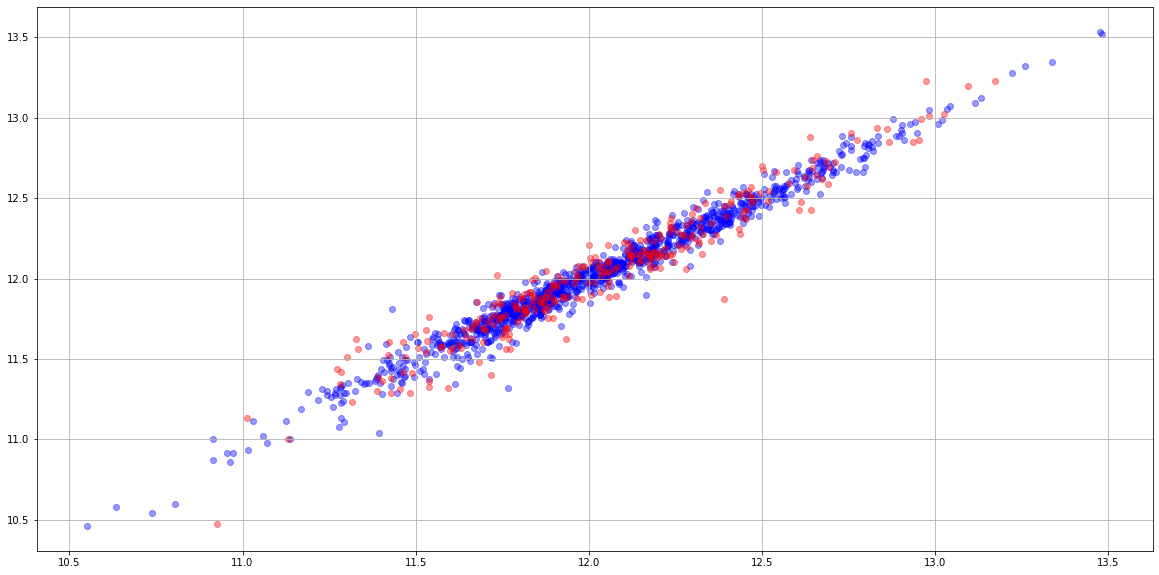

In [35]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_rfrfltr.best_estimator_.predict(xtrain_rfr_fltr), ytrain_rfr_fltr, color='blue', alpha=0.4)
plt.scatter(gs_gbm_rfrfltr.best_estimator_.predict(xtest_rfr_fltr), ytest_rfr_fltr, color='red', alpha=0.4)
plt.grid(which='both')

In [36]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

learningrate = [0.08, 0.09, 0.1, 0.11, 0.12] # subsequently, fine tune
nestimators = [176, 178, 180, 182, 184, 186, 188]

maxfeatures = [22, 24, 26, 28, 30, 32, 34, 36, 38]
maxdepth = [1, 2, 3, 4]

gparam_gbm = {'learning_rate': learningrate,
              'n_estimators': nestimators, 
              'max_features': maxfeatures,
              'max_depth': maxdepth}

gs_gbm_rfrfltr_2 = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm_rfrfltr_2.fit(xtrain_rfr_fltr, ytrain_rfr_fltr)

# setting up dataframe for results
train_scores.append(gs_gbm_rfrfltr_2.best_estimator_.score(xtrain_rfr_fltr, ytrain_rfr_fltr))
test_scores.append(gs_gbm_rfrfltr_2.best_estimator_.score(xtest_rfr_fltr, ytest_rfr_fltr))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm_rfrfltr_2, ytrain_rfr_fltr, xtrain_rfr_fltr))
test_rmse.append(rmse(gs_gbm_rfrfltr_2, ytest_rfr_fltr, xtest_rfr_fltr))

# add the best parameters to the df
best_par_list.append(gs_gbm_rfrfltr_2.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

      Iter       Train Loss   Remaining Time 
         1           0.1400            0.18s
         2           0.1246            0.09s
         3           0.1117            0.18s
         4           0.1001            0.18s
         5           0.0907            0.18s
         6           0.0809            0.15s
         7           0.0734            0.15s
         8           0.0680            0.15s
         9           0.0622            0.16s
        10           0.0578            0.16s
        20           0.0291            0.15s
        30           0.0187            0.13s
        40           0.0143            0.13s
        50           0.0120            0.12s
        60           0.0106            0.11s
        70           0.0096            0.10s
        80           0.0088            0.09s
        90           0.0082            0.08s
       100           0.0078            0.07s
Wall time: 43.1 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,max_features,n_estimators
0,0.966405,0.925894,0.072648,0.112067,-0.039419,0.09,3,26,184


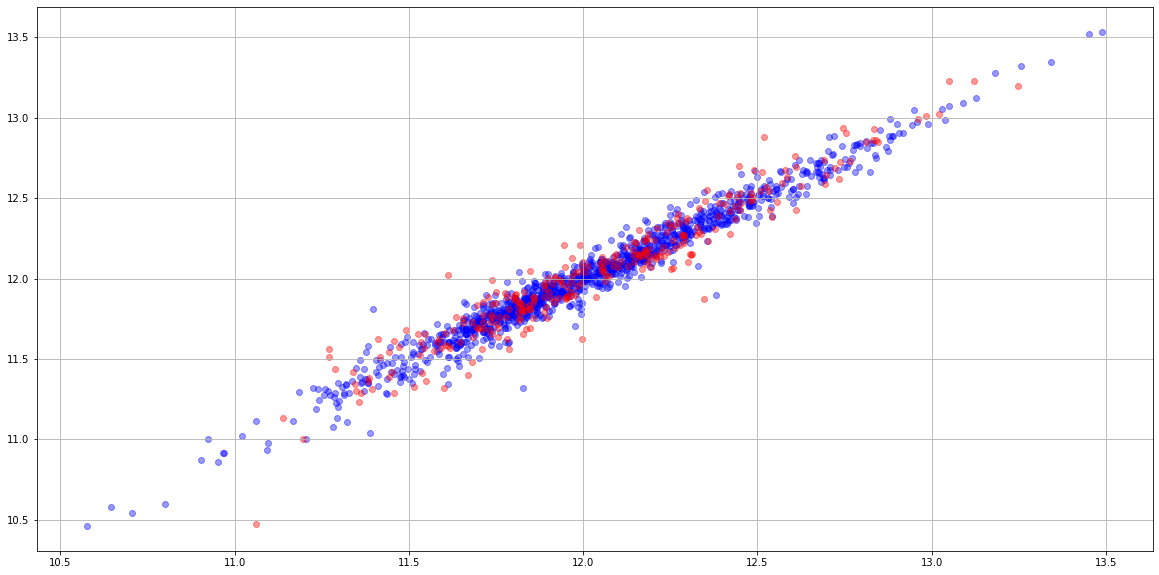

In [37]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm_rfrfltr_2.best_estimator_.predict(xtrain_rfr_fltr), ytrain_rfr_fltr, color='blue', alpha=0.4)
plt.scatter(gs_gbm_rfrfltr_2.best_estimator_.predict(xtest_rfr_fltr), ytest_rfr_fltr, color='red', alpha=0.4)
plt.grid(which='both')

In [41]:
hp_full_strd

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass_120.0,MSSubClass_1